In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
df_2014 = pd.read_csv('2014_Call_a_bike.csv')

In [3]:
df_2014.count()

date                         4285344
BOOKING_HAL_ID               4285344
CATEGORY_HAL_ID              4285344
VEHICLE_HAL_ID               4285344
CUSTOMER_HAL_ID              4285344
DATE_BOOKING                 4285344
DATE_FROM                    4285344
DATE_UNTIL                   4285344
COMPUTE_EXTRA_BOOKING_FEE    4285344
TRAVERSE_USE                 4285344
DISTANCE                     4285343
START_RENTAL_ZONE            3288450
START_RENTAL_ZONE_HAL_ID     4156336
END_RENTAL_ZONE              3265396
END_RENTAL_ZONE_HAL_ID       4133821
RENTAL_ZONE_HAL_SRC          4252326
CITY_RENTAL_ZONE             4285344
TECHNICAL_INCOME_CHANNEL     4209687
dtype: int64

In [4]:
df_2014.head()

,date,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,2014-01-01 00:34:54,21366843,51000,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:34:54,2014-01-01 00:50:14,Nein,Nein,0.0,U-Bahn Baumwall,214170.0,Mönckebergstraße / Rosenstraße,131880.0,Standort,Hamburg,iPhone SRH
1,2014-01-01 01:39:55,21367069,51000,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:39:55,2014-01-01 01:57:27,Nein,Nein,0.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Schulterblatt/Eifflerstraße,131648.0,Standort,Hamburg,Android SRH
2,2014-01-01 01:40:20,21367072,51000,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:40:20,2014-01-01 01:53:09,Nein,Nein,0.0,Weidestraße/Biedermannplatz,211922.0,Jarrestraße / Rambatzweg,138376.0,Standort,Hamburg,Techniker HH_119 (-2334-)
3,2014-01-01 01:56:00,21367118,51000,117519,A1062EF019B4E3E71C551572F1B284D55440E3C4,2014-01-01 01:56:00,2014-01-01 01:56:00,2014-01-01 01:56:41,Nein,Nein,0.0,Große Bergstraße / Jessenstraße,131649.0,Große Bergstraße / Jessenstraße,131649.0,Standort,Hamburg,Terminal HH_46 (-2115-)
4,2014-01-01 02:05:55,21367155,51000,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:05:55,2014-01-01 02:13:49,Nein,Nein,0.0,Mundsburg / Schürbeker Straße,140799.0,Bartholomäusstraße/Beim Alten Schützenhof,211923.0,Standort,Hamburg,iPhone SRH


In [5]:
df_2014.drop(['COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE', 'BOOKING_HAL_ID', 'CUSTOMER_HAL_ID'], axis=1, inplace=True)

In [6]:
CITY = df_2014.CITY_RENTAL_ZONE.unique()

In [7]:
category = df_2014.CATEGORY_HAL_ID.unique()

In [8]:
df_2014.head()

,date,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,2014-01-01 00:34:54,51000,143517,2014-01-01 00:34:54,2014-01-01 00:34:54,2014-01-01 00:50:14,U-Bahn Baumwall,214170.0,Mönckebergstraße / Rosenstraße,131880.0,Standort,Hamburg,iPhone SRH
1,2014-01-01 01:39:55,51000,119830,2014-01-01 01:39:55,2014-01-01 01:39:55,2014-01-01 01:57:27,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Schulterblatt/Eifflerstraße,131648.0,Standort,Hamburg,Android SRH
2,2014-01-01 01:40:20,51000,143501,2014-01-01 01:40:20,2014-01-01 01:40:20,2014-01-01 01:53:09,Weidestraße/Biedermannplatz,211922.0,Jarrestraße / Rambatzweg,138376.0,Standort,Hamburg,Techniker HH_119 (-2334-)
3,2014-01-01 01:56:00,51000,117519,2014-01-01 01:56:00,2014-01-01 01:56:00,2014-01-01 01:56:41,Große Bergstraße / Jessenstraße,131649.0,Große Bergstraße / Jessenstraße,131649.0,Standort,Hamburg,Terminal HH_46 (-2115-)
4,2014-01-01 02:05:55,51000,108641,2014-01-01 02:05:55,2014-01-01 02:05:55,2014-01-01 02:13:49,Mundsburg / Schürbeker Straße,140799.0,Bartholomäusstraße/Beim Alten Schützenhof,211923.0,Standort,Hamburg,iPhone SRH


In [9]:
print(len(CITY))
print(len(category))

48
4


In [10]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(df_2014[df_2014['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])

In [11]:
print(city_dict)

{'Hamburg': 2435293, 'Berlin': 339209, 'Frankfurt am Main': 431315, 'Kassel': 205315, 'Stuttgart': 152526, 'Düsseldorf': 377, 'München': 358750, 'Halle': 699, 'Köln': 253087, 'Mannheim': 718, 'Braunschweig': 105, 'Mainz': 167, 'Flugh. Frankfurt': 2570, 'Göttingen': 194, 'Bamberg': 78, 'Erlangen': 54, 'Bonn': 257, 'Weimar': 100, 'Würzburg': 156, 'Freiburg': 346, 'Wiesbaden': 9950, 'Magdeburg': 93, 'Darmstadt': 25503, 'Wolfsburg': 100, 'Heidelberg': 439, 'Fulda': 69, 'Hannover': 422, 'Bremen': 166, 'Lübeck': 148, 'Hanau': 58, 'Augsburg': 4, 'Troisdorf': 84, 'Karlsruhe': 301, 'Baden-Baden': 25, 'Warnemünde': 42, 'Gütersloh': 22, 'Bielefeld': 45, 'Saarbrücken': 83, 'Aschaffenburg': 27, 'Ingolstadt': 27, 'Rostock': 59, 'Kaiserslautern': 50, 'Oldenburg (Oldb)': 39, 'Marburg': 44192, 'Aachen': 419, 'Rüsselsheim': 21645, 'Oberhausen': 14, 'Hennef': 2}


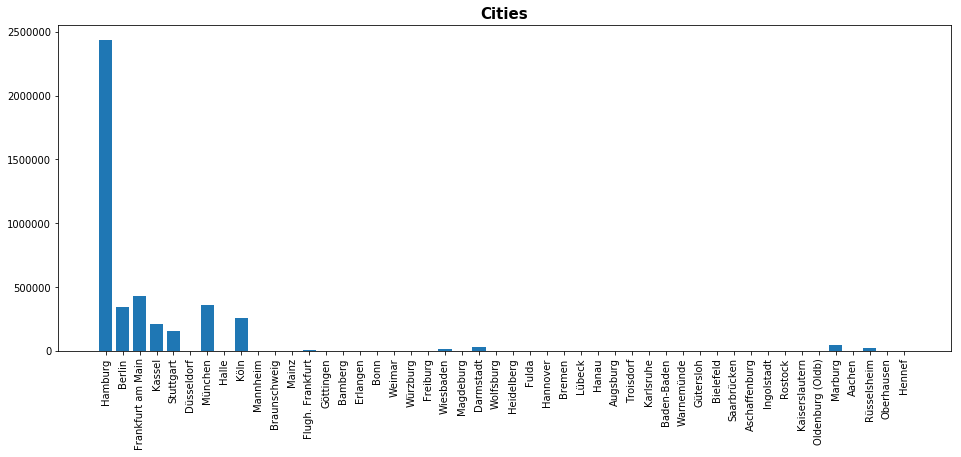

In [12]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()

In [13]:
category_dict = {}
categories, category_count = [],[]
for c in category:
    category_dict[c] = len(df_2014[df_2014['CATEGORY_HAL_ID']==c])
    categories.append(c)
    category_count.append(category_dict[c])

In [14]:
print(category_dict)

{51000: 2435293, 50000: 1633888, 53000: 205315, 50001: 10848}


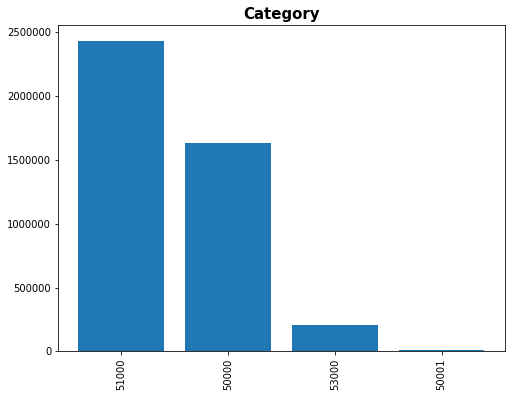

In [15]:
x_plot = np.arange(len(categories))
plt.figure(figsize=(8,6))
plt.title('Category', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, category_count)
plt.xticks(x_plot+1, categories, rotation = 'vertical')
plt.show()

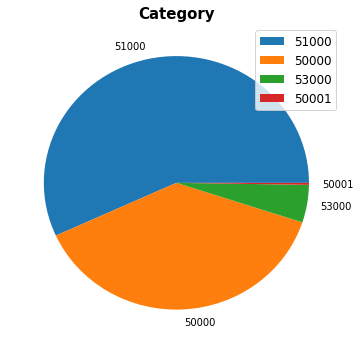

In [16]:
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(5,5))
plt.title('Category', fontsize=15, fontweight='bold')
plt.pie(category_count, labels=categories)
plt.legend(categories, fontsize = 'large', loc = "best")
plt.tight_layout()
plt.show()

In [17]:
del df_2014['date']
df_2014.head()

,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,51000,143517,2014-01-01 00:34:54,2014-01-01 00:34:54,2014-01-01 00:50:14,U-Bahn Baumwall,214170.0,Mönckebergstraße / Rosenstraße,131880.0,Standort,Hamburg,iPhone SRH
1,51000,119830,2014-01-01 01:39:55,2014-01-01 01:39:55,2014-01-01 01:57:27,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Schulterblatt/Eifflerstraße,131648.0,Standort,Hamburg,Android SRH
2,51000,143501,2014-01-01 01:40:20,2014-01-01 01:40:20,2014-01-01 01:53:09,Weidestraße/Biedermannplatz,211922.0,Jarrestraße / Rambatzweg,138376.0,Standort,Hamburg,Techniker HH_119 (-2334-)
3,51000,117519,2014-01-01 01:56:00,2014-01-01 01:56:00,2014-01-01 01:56:41,Große Bergstraße / Jessenstraße,131649.0,Große Bergstraße / Jessenstraße,131649.0,Standort,Hamburg,Terminal HH_46 (-2115-)
4,51000,108641,2014-01-01 02:05:55,2014-01-01 02:05:55,2014-01-01 02:13:49,Mundsburg / Schürbeker Straße,140799.0,Bartholomäusstraße/Beim Alten Schützenhof,211923.0,Standort,Hamburg,iPhone SRH


In [18]:
df_2014['DATE_BOOKING'] = pd.to_datetime(df_2014['DATE_BOOKING'])

In [19]:
df_2014.index = df_2014['DATE_BOOKING']
df_2014.head()

,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
DATE_BOOKING,,,,,,,,,,,,
2014-01-01 00:34:54,51000,143517,2014-01-01 00:34:54,2014-01-01 00:34:54,2014-01-01 00:50:14,U-Bahn Baumwall,214170.0,Mönckebergstraße / Rosenstraße,131880.0,Standort,Hamburg,iPhone SRH
2014-01-01 01:39:55,51000,119830,2014-01-01 01:39:55,2014-01-01 01:39:55,2014-01-01 01:57:27,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Schulterblatt/Eifflerstraße,131648.0,Standort,Hamburg,Android SRH
2014-01-01 01:40:20,51000,143501,2014-01-01 01:40:20,2014-01-01 01:40:20,2014-01-01 01:53:09,Weidestraße/Biedermannplatz,211922.0,Jarrestraße / Rambatzweg,138376.0,Standort,Hamburg,Techniker HH_119 (-2334-)
2014-01-01 01:56:00,51000,117519,2014-01-01 01:56:00,2014-01-01 01:56:00,2014-01-01 01:56:41,Große Bergstraße / Jessenstraße,131649.0,Große Bergstraße / Jessenstraße,131649.0,Standort,Hamburg,Terminal HH_46 (-2115-)
2014-01-01 02:05:55,51000,108641,2014-01-01 02:05:55,2014-01-01 02:05:55,2014-01-01 02:13:49,Mundsburg / Schürbeker Straße,140799.0,Bartholomäusstraße/Beim Alten Schützenhof,211923.0,Standort,Hamburg,iPhone SRH


In [20]:
df_month = df_2014.groupby(pd.TimeGrouper(freq='M'))

In [21]:
tem = df_month['DATE_BOOKING'].count()

In [22]:
month_name=[]
month_wise_booking=[]
for p,l in tem.items():
    month_name.append(calendar.month_abbr[p.month])
    month_wise_booking.append(l)

In [23]:
print(month_name)
print(month_wise_booking)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[142368, 170409, 294933, 383128, 446986, 490295, 544645, 476257, 444825, 415695, 313274, 162529]


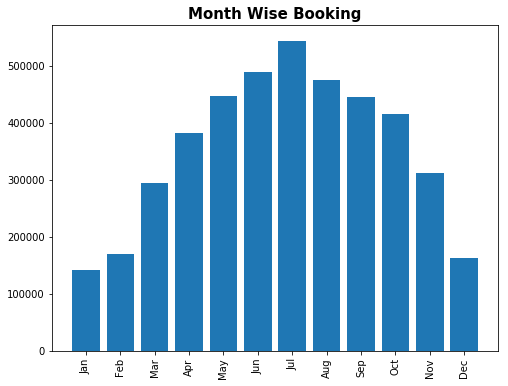

In [24]:
x_plot = np.arange(len(month_name))
plt.figure(figsize=(8,6))
plt.title('Month Wise Booking', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_wise_booking)
plt.xticks(x_plot+1, month_name, rotation = 'vertical')
plt.show()

In [25]:
df_2014.count()

CATEGORY_HAL_ID             4285344
VEHICLE_HAL_ID              4285344
DATE_BOOKING                4285344
DATE_FROM                   4285344
DATE_UNTIL                  4285344
START_RENTAL_ZONE           3288450
START_RENTAL_ZONE_HAL_ID    4156336
END_RENTAL_ZONE             3265396
END_RENTAL_ZONE_HAL_ID      4133821
RENTAL_ZONE_HAL_SRC         4252326
CITY_RENTAL_ZONE            4285344
TECHNICAL_INCOME_CHANNEL    4209687
dtype: int64

In [26]:
df = df_2014.dropna(subset = ['TECHNICAL_INCOME_CHANNEL'],how='any', axis=0)

In [27]:
df.count()

CATEGORY_HAL_ID             4209687
VEHICLE_HAL_ID              4209687
DATE_BOOKING                4209687
DATE_FROM                   4209687
DATE_UNTIL                  4209687
START_RENTAL_ZONE           3232113
START_RENTAL_ZONE_HAL_ID    4083266
END_RENTAL_ZONE             3208994
END_RENTAL_ZONE_HAL_ID      4060444
RENTAL_ZONE_HAL_SRC         4177279
CITY_RENTAL_ZONE            4209687
TECHNICAL_INCOME_CHANNEL    4209687
dtype: int64

In [28]:
channel = df['TECHNICAL_INCOME_CHANNEL']

In [29]:
channel_group = {'android':[], 'iphone': [], 'windows': [], 'other': []}
for j in channel:
    if ('Android' in j):
        channel_group['android'].append(j)
    elif ('iPhone' in j):
        channel_group['iphone'].append(j)
    elif ('Windows' in j):
        channel_group['windows'].append(j)
    else:
        channel_group['other'].append(j)

In [30]:
groups, group_count = [],[]
for i in channel_group:
    groups.append(i)
    group_count.append(len(channel_group[i]))
print(groups)
print(group_count)

['android', 'iphone', 'windows', 'other']
[886498, 1323696, 8051, 1991442]


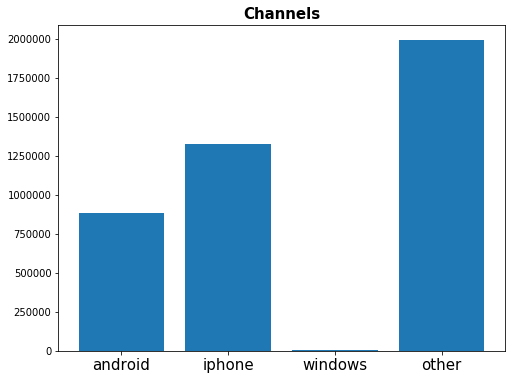

In [31]:
x_plot = np.arange(len(groups))
plt.figure(figsize=(8,6))
plt.title('Channels', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, group_count)
plt.xticks(x_plot+1, groups, fontsize=15)
plt.show()